# **MegaMart Customer Segmentation Analysis**



- Daniela Robles, A01659074

- Adrián Tavera, A01659113

- Elian López, A01659582

### **Section 1: Project Setup & Data Loading**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

In [ ]:
# Configuración
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# 1. CARGAR LOS DATOS
df = pd.read_csv('retail_customer_data-1.csv')

print(f"Datos cargados: {df.shape[0]} clientes y {df.shape[1]} columnas.")

# 2. PREPROCESAMIENTO
# Guardamos los IDs en una variable aparte para usarlos al final en el reporte
customer_ids = df['customer_id']

# Creamos un dataframe solo con las columnas numéricas para el algoritmo
df_analysis = df.drop('customer_id', axis=1)

print("\n--- Primeras 5 filas (Listas para Análisis) ---")
display(df_analysis.head())

print("\n--- Estadísticas Descriptivas ---")
display(df_analysis.describe())

Datos cargados: 3000 clientes y 10 columnas.

--- Primeras 5 filas (Listas para Análisis) ---


,monthly_transactions,avg_basket_size,total_spend,avg_session_duration,email_open_rate,product_views_per_visit,return_rate,customer_tenure_months,recency_days
0,1.8,3.0,527.04,38.1,0.95,17.3,0.00,23,33
1,5.4,4.5,1137.72,20.0,0.00,16.1,0.41,1,8
2,2.9,4.4,670.28,64.3,0.52,36.9,0.11,32,39
3,12.0,22.8,6359.35,37.9,0.17,42.2,0.00,21,5
4,2.2,17.6,4058.48,22.5,0.53,18.4,0.15,20,18



--- Estadísticas Descriptivas ---


,monthly_transactions,avg_basket_size,total_spend,avg_session_duration,email_open_rate,product_views_per_visit,return_rate,customer_tenure_months,recency_days
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,6.011300,9.485133,2367.375387,38.441533,0.443720,31.359467,0.185890,17.912667,20.680667
std,4.776564,7.961280,2248.271454,14.334159,0.427384,9.964088,0.162283,11.242294,12.055419
min,0.200000,1.000000,50.000000,3.400000,0.000000,3.000000,0.000000,1.000000,1.000000
25%,2.100000,3.300000,511.115000,27.000000,0.000000,24.900000,0.040000,9.000000,11.000000
50%,5.000000,5.600000,1456.105000,36.550000,0.340000,31.600000,0.150000,18.000000,18.000000
75%,8.800000,17.325000,3772.227500,49.400000,0.950000,37.800000,0.290000,26.000000,29.250000
max,22.300000,31.600000,8746.290000,87.300000,0.950000,62.400000,0.500000,59.000000,67.000000


### **Section 2: Exploratory Data Analysis (EDA)**

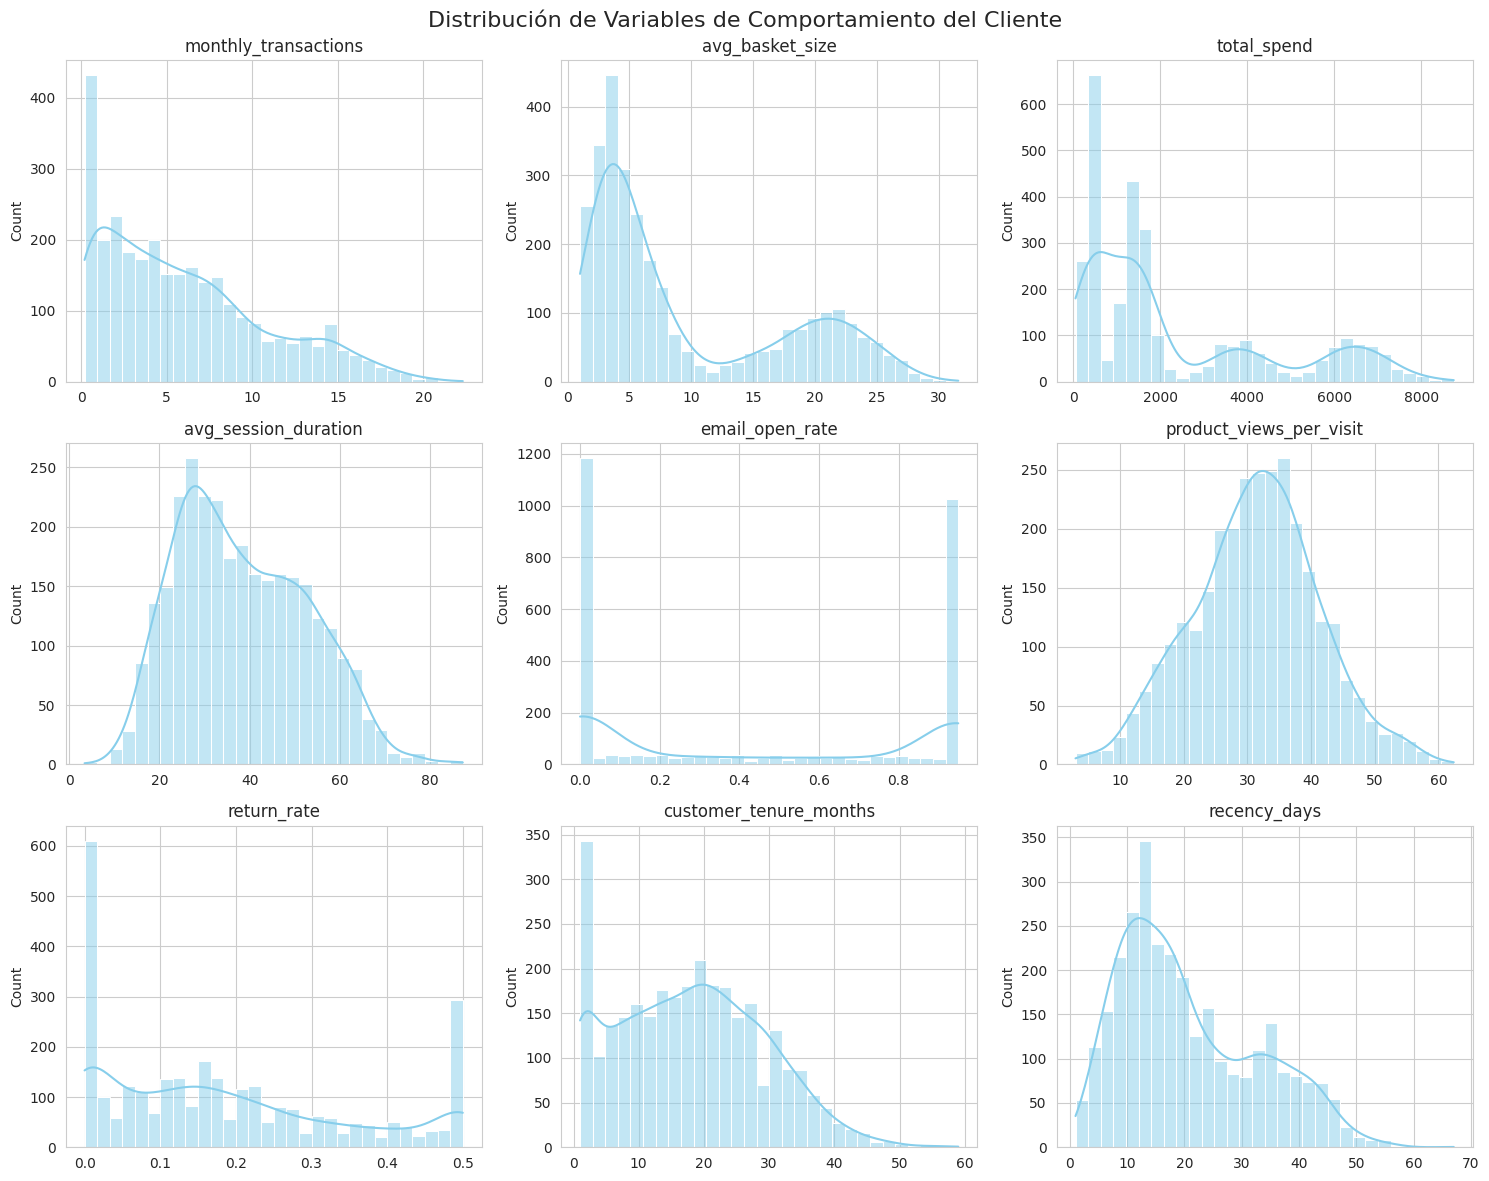

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle("Distribución de Variables de Comportamiento del Cliente", fontsize=16)

# Aplanar el array de ejes para poder iterar fácilmente
axes = axes.flatten()

# Recorrer todas las columnas y hacer su histograma
for i, col in enumerate(df_analysis.columns):
    sns.histplot(df_analysis[col], bins=30, kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(col)
    axes[i].set_xlabel("")

plt.tight_layout()
plt.show()

Análisis de Distribución: Variable por Variable

**1. monthly_transactions.**

La barra más alta está a la izquierda y esto nos indica que la gran mayoría de clientes son compradores ocasionales (vienen 1 o 2 veces al mes). Hay muy pocos clientes que vienen más de 10 veces.


**2. avg_basket_size.**

 La gente entra a MegaMart a comprar pocas cosas a la vez (3-5 artículos). Son compras puntuales, no es masiva la compra.


**3. total_spend.**

Casi todos los clientes gastan poco (menos de 2k), pero hay un pequeño grupo de clientes que gastan mucho más (arriba de los 6k).

**4. avg_session_duration.**

La mayoría de la gente se queda un tiempo promedio, ni se van muy rápido ni muy lento.

**5. email_open_rate**

Un grupo grande en 0 (izquierda) y otro grupo en 1 (derecha). Los clientes abren todo, o lo ignoran.

**6. product_views_per_visit**

La mayoría ve una cantidad estándar de productos.

**7. return_rate**

Muy cargada a la izquierda (cerca del 0). La mayoría de la gente no devuelve casi nada. Sin embargo, esa barra de la derecha (gente que devuelve el 50% de lo que compra) es un peligro. Son clientes que cuestan dinero. Hay que identificarlos.

**8. customer_tenure_months**

Tienes una mezcla saludable. Tienes clientes nuevos (barras a la izquierda) y clientes viejos (barras a la derecha).

**9. recency_days**

Muestra que muchas personas no dejan pasar varios dìas hasta volver a comprar, y los que tardan más en comprar es un menor grupo.

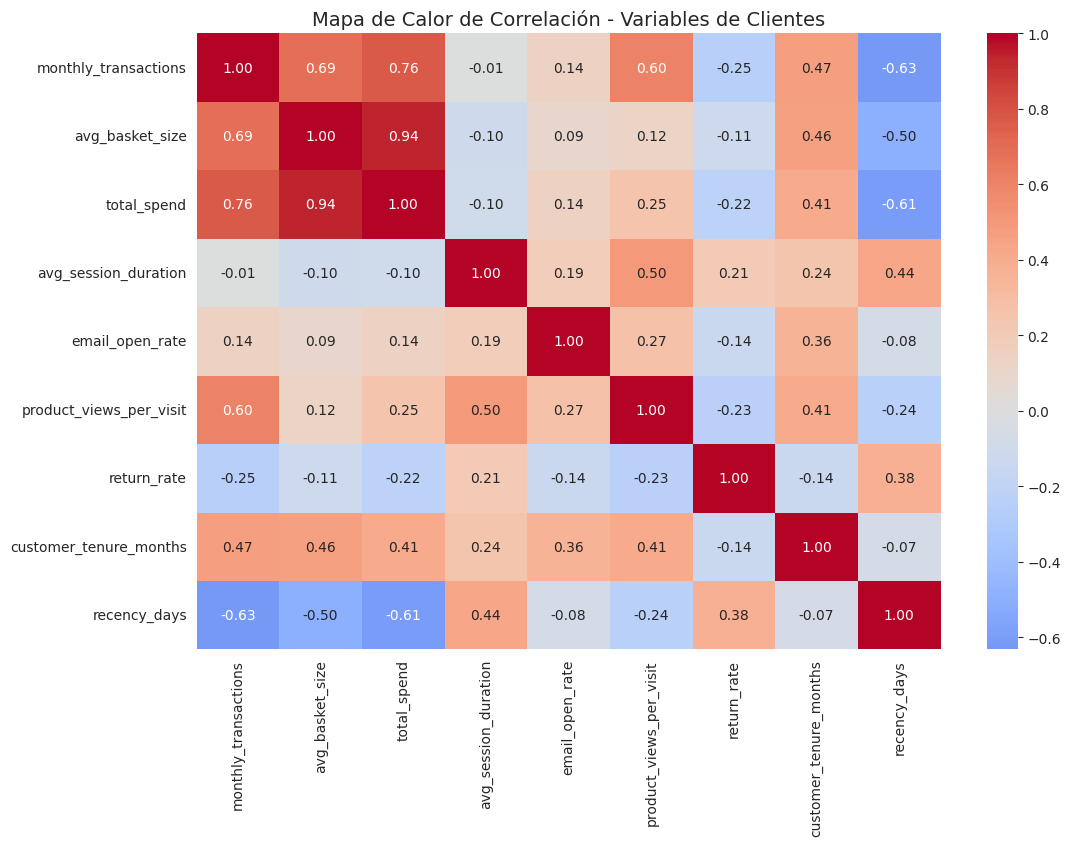


--- Correlaciones más fuertes ---
avg_basket_size          total_spend             0.940972
total_spend              monthly_transactions    0.764490
monthly_transactions     avg_basket_size         0.691077
product_views_per_visit  monthly_transactions    0.600757
recency_days             total_spend            -0.611667
monthly_transactions     recency_days           -0.631584
dtype: float64


In [ ]:
plt.figure(figsize=(12, 8))
correlation_matrix = df_analysis.corr()

# Dibujar el mapa de calor
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title("Mapa de Calor de Correlación - Variables de Clientes", fontsize=14)
plt.show()

# Imprimir las correlaciones más fuertes (positivas o negativas)
print("\n--- Correlaciones más fuertes ---")
corr_pairs = correlation_matrix.unstack()
strong_pairs = corr_pairs[abs(corr_pairs) > 0.6].sort_values(ascending=False)
# Filtramos para no repetir (A-B es lo mismo que B-A) y quitamos la diagonal (1.0)
print(strong_pairs[strong_pairs < 1.0].drop_duplicates())

**Interpretación de la Matriz de Correlación
El análisis revela qué impulsa realmente el dinero en MegaMart:**


1. El Motor Principal del Gasto (Correlación: 0.94) La relación más fuerte de todo el mapa no es la frecuencia, sino el volumen por compra.

Existe una correlación de 0.94 entre total_spend y avg_basket_size. Los clientes los que más pagan son aquellos que llenan el carrito con muchos artículos en cada visita, más que los que vienen muchas veces pero compran poco.

2. El Factor de Frecuencia (Correlación: 0.76), la relación entre total_spend y monthly_transactions es de 0.76. Si logramos que un cliente venga más veces, gastará más, pero no es tan determinante como lograr que llene más el carrito.

3. El Comportamiento de "Vitrineo" (Correlación: 0.60) Hay una correlación de(0.60) entre las monthly_transactions y product_views_per_visit.
La gente que viene seguido a la tienda también es la que más "explora" productos.

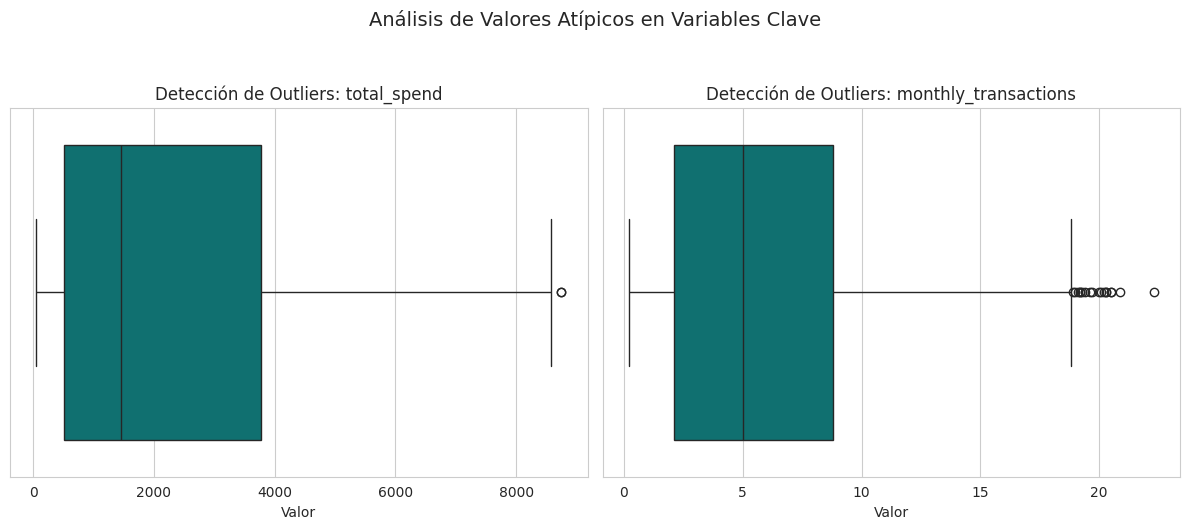

In [ ]:
critical_vars = ['total_spend', 'monthly_transactions']

plt.figure(figsize=(12, 5))

for i, col in enumerate(critical_vars):
    plt.subplot(1, 2, i + 1)
    sns.boxplot(x=df_analysis[col], color='teal')
    plt.title(f'Detección de Outliers: {col}', fontsize=12)
    plt.xlabel("Valor")

plt.suptitle("Análisis de Valores Atípicos en Variables Clave", y=1.05, fontsize=14)
plt.tight_layout()
plt.show()

Detección de Valores Atípicos
El análisis visual mediante diagramas de caja revela patrones de comportamiento extremos en las dos variables más críticas para el negocio: Dinero y Frecuencia.

1. Gasto Total
Lo que vemos: La caja principal (donde vive el 50% de los clientes promedio) está comprimida en la parte inferior, oscilando entre 500 y 3,500 aproximadamente.

Observamos una densa nube de puntos negros por encima del bigote superior. Estos son outliers positivos; representan a usuarios que gastan hasta 3 o 4 veces más que el cliente promedio (llegando a casi $9,000).

2. Transacciones Mensuales
El cliente típico realiza entre 3 y 8 transacciones al mes.
El Hallazgo Crítico: Al igual que en el gasto, vemos una serie de puntos atípicos en la parte superior, llegando hasta las 20-22 visitas mensuales.

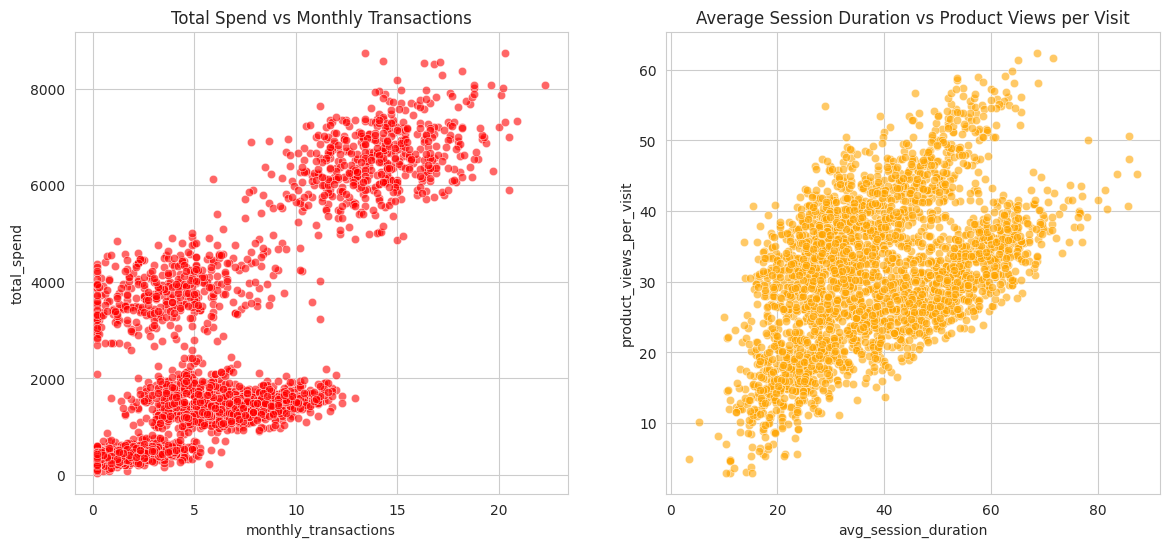

In [ ]:
plt.figure(figsize = (14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data = df, x = 'monthly_transactions', y = 'total_spend', color = 'red', alpha = 0.6)
plt.title('Total Spend vs Monthly Transactions')

plt.subplot(1, 2, 2)
sns.scatterplot(data = df, x = 'avg_session_duration', y = 'product_views_per_visit', color = 'orange', alpha = 0.6)
plt.title('Average Session Duration vs Product Views per Visit')

plt.show()

El análisis visual de la matriz de dispersión revela la estructura fundamental de los ingresos de MegaMart, destacando cómo interactúan las variables críticas. Observamos una correlación lineal casi perfecta y compacta entre el Tamaño del Carrito y el Gasto Total, lo que identifica al volumen de artículos por visita como el motor más directo y predecible de los ingresos; es decir, cada artículo adicional incrementa proporcionalmente el valor del cliente. Por otro lado, la relación entre la Frecuencia de Transacciones y el Gasto Total muestra una tendencia positiva pero con una dispersión en forma de "abanico"; esto indica que, si bien visitar más la tienda suele aumentar el gasto acumulado, existen clientes muy frecuentes con tickets bajos. Finalmente, las distribuciones sesgadas hacia la derecha visibles en la diagonal principal reafirman la necesidad técnica de haber estandarizado los datos, ya que sin este paso, la gran magnitud de la variable de dinero habría dominado incorrectamente el modelo de segmentación.

### **Section 3: Data Preprocessing**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# 2. Ajustar y transformar los datos
# Esto convierte todo a una escala común (Media = 0, Desviación = 1)
X_standardized = scaler.fit_transform(df_analysis)

# 3. Convertir de nuevo a DataFrame
df_std = pd.DataFrame(X_standardized, columns=df_analysis.columns)

print("¡Estandarización completada!")
print("\n--- Verificación Rápida ---")
print(df_std.describe().round(2))

¡Estandarización completada!

--- Verificación Rápida ---
       monthly_transactions  avg_basket_size  total_spend  \
count               3000.00          3000.00      3000.00   
mean                   0.00            -0.00         0.00   
std                    1.00             1.00         1.00   
min                   -1.22            -1.07        -1.03   
25%                   -0.82            -0.78        -0.83   
50%                   -0.21            -0.49        -0.41   
75%                    0.58             0.98         0.62   
max                    3.41             2.78         2.84   

       avg_session_duration  email_open_rate  product_views_per_visit  \
count               3000.00          3000.00                  3000.00   
mean                   0.00            -0.00                     0.00   
std                    1.00             1.00                     1.00   
min                   -2.45            -1.04                    -2.85   
25%                   -0.80

### **Section 4: Hierarchical Clustering Analysis**

Calculando método: single...
Calculando método: complete...
Calculando método: average...
Calculando método: ward...


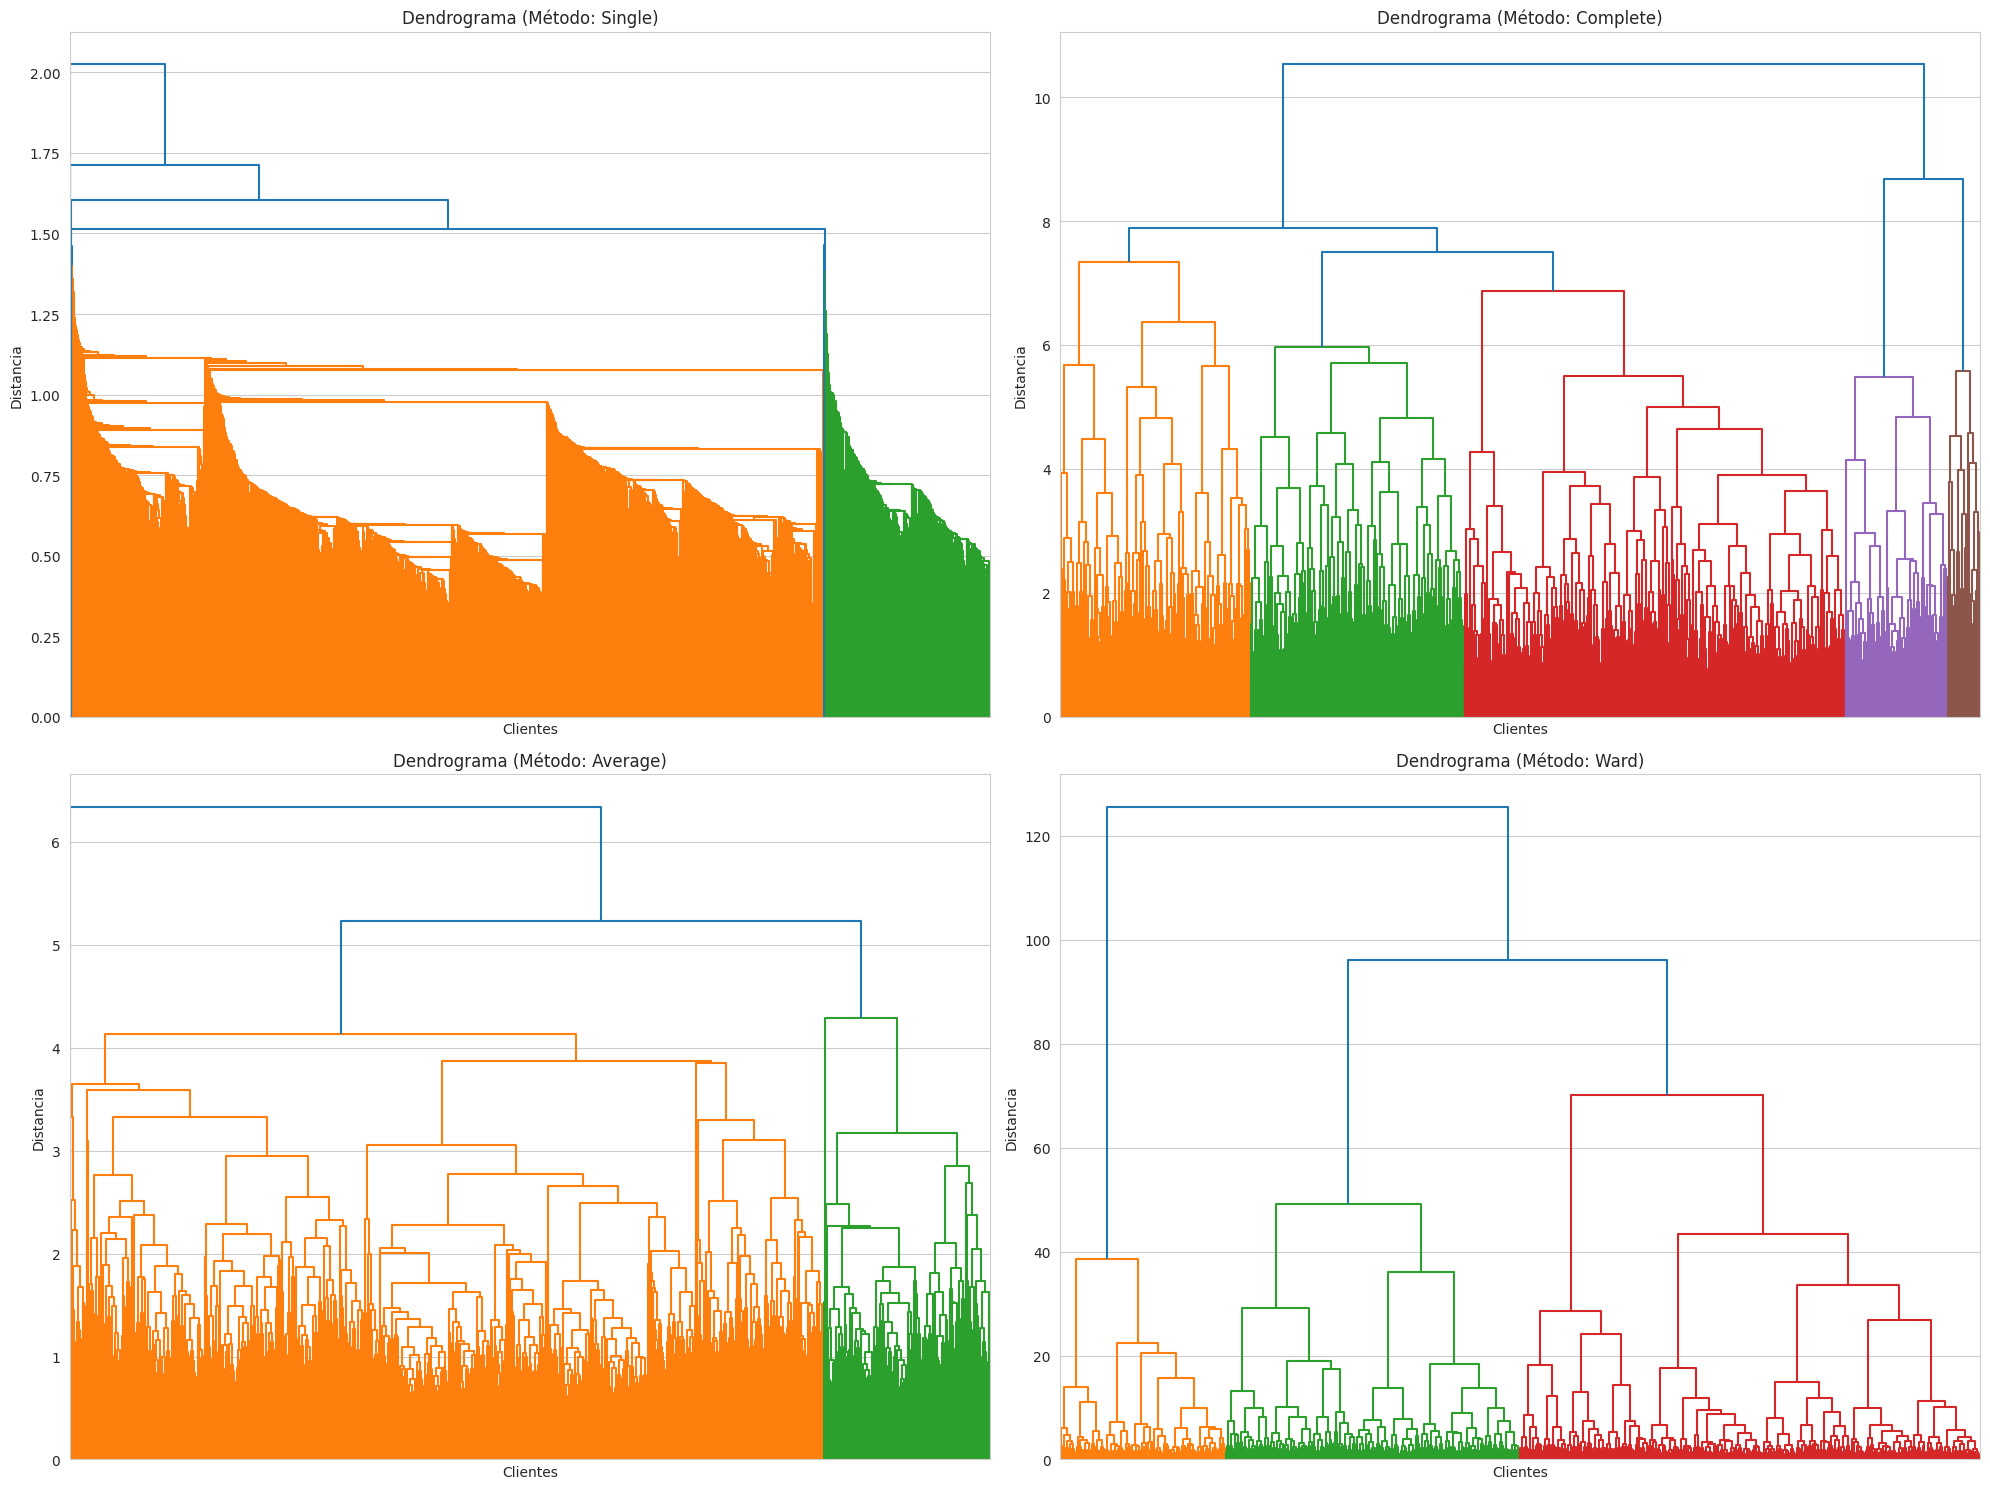

In [ ]:
# CLUSTERING
from scipy.cluster.hierarchy import dendrogram, linkage

# 1. Calcular la matriz de enlaces
# Comparación de métodos de enlace

methods = ['single', 'complete', 'average', 'ward']
plt.figure(figsize=(20, 15))

for i, method in enumerate(methods):
    # Crear un subplot de 2x2 (posición i+1)
    plt.subplot(2, 2, i + 1)

    # Calcular el linkage
    print(f"Calculando método: {method}...")
    Z = linkage(df_std, method=method)

    # Dibujar dendrograma
    dendrogram(Z, no_labels=True)

    plt.title(f'Dendrograma (Método: {method.capitalize()})')
    plt.xlabel('Clientes')
    plt.ylabel('Distancia')

plt.tight_layout()
plt.show()

1. Single Linkage
El dendrograma presenta una estructura escalonada o de "escalera", sin grupos definidos. Al unir los puntos basándose en la distancia mínima, tiende a fusionar clientes individuales uno por uno a un solo gran grupo en lugar de detectar estructuras compactas. Es altamente sensible al ruido y no es útil para segmentación de mercado.

2. Complete Linkage
Muestra agrupaciones más compactas que el enlace simple, pero la estructura general se ve comprimida y difícil de interpretar. Al basarse en la distancia máxima entre puntos, este método evita el encadenamiento pero tiende a romper grupos grandes o a ser sensible a outliers (valores atípicos), lo que resulta en una jerarquía confusa para determinar un número óptimo de segmentos.

3. Average Linkage
Presenta una estructura intermedia. Mejora respecto al enlace simple, pero aún carece de la definición clara de ramas principales que se observa en el método Ward. Utiliza la distancia promedio entre pares de observaciones. En este conjunto de datos no logra maximizar la separación entre los grupos de comportamiento tan claramente como se requiere.

4. Ward’s Method
El dendrograma muestra una estructura de árbol equilibrada, simétrica y con ramas claramente diferenciadas desde la parte superior.
A diferencia de los otros métodos basados en distancias simples, el método de Ward busca minimizar la varianza intra-cluster (la suma de cuadrados dentro de cada grupo). Esto favorece la creación de clusters compactos, homogéneos y de tamaño similar, lo cual es ideal para crear perfiles de clientes accionables.


### **Section 5: Determining Optimal Number of Clusters (Hierarchical)**

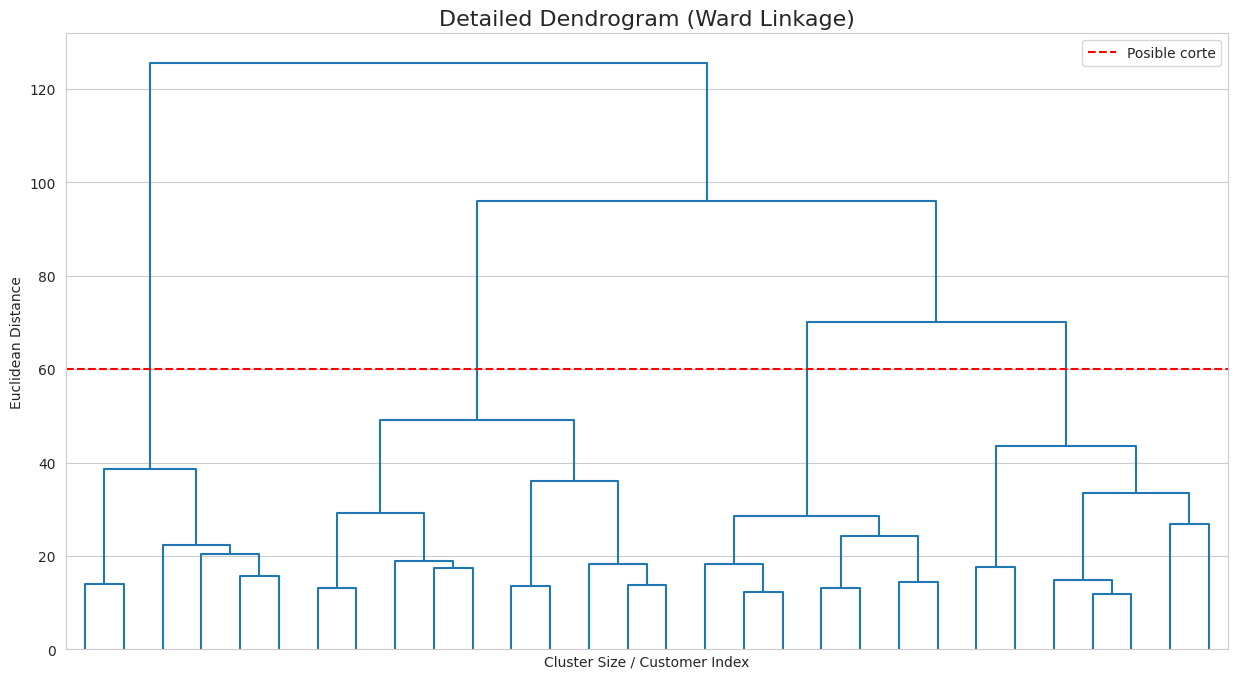

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
# 1. Calcular linkage solo con Ward
Z_ward = linkage(df_std, method='ward')

# 2. Graficar
plt.figure(figsize=(15, 8))
dendrogram(Z_ward,
           no_labels=True,
           color_threshold=0,
           truncate_mode='lastp',
           p=30)
plt.title('Detailed Dendrogram (Ward Linkage)', fontsize=16)
plt.xlabel('Cluster Size / Customer Index')
plt.ylabel('Euclidean Distance')

# Línea de corte
plt.axhline(y=60, color='r', linestyle='--', label='Posible corte')
plt.legend()
plt.show()

### **Section 6: K-Means Clustering - Elbow Method**

Calculando modelos K-Means (k=2 a k=10)...
k=2: Inercia=19065.45, Silueta=0.345
k=3: Inercia=14397.53, Silueta=0.297
k=4: Inercia=11944.28, Silueta=0.317
k=5: Inercia=10616.55, Silueta=0.270
k=6: Inercia=9517.15, Silueta=0.279
k=7: Inercia=8736.43, Silueta=0.281
k=8: Inercia=7999.74, Silueta=0.278
k=9: Inercia=7454.65, Silueta=0.266
k=10: Inercia=6981.05, Silueta=0.271


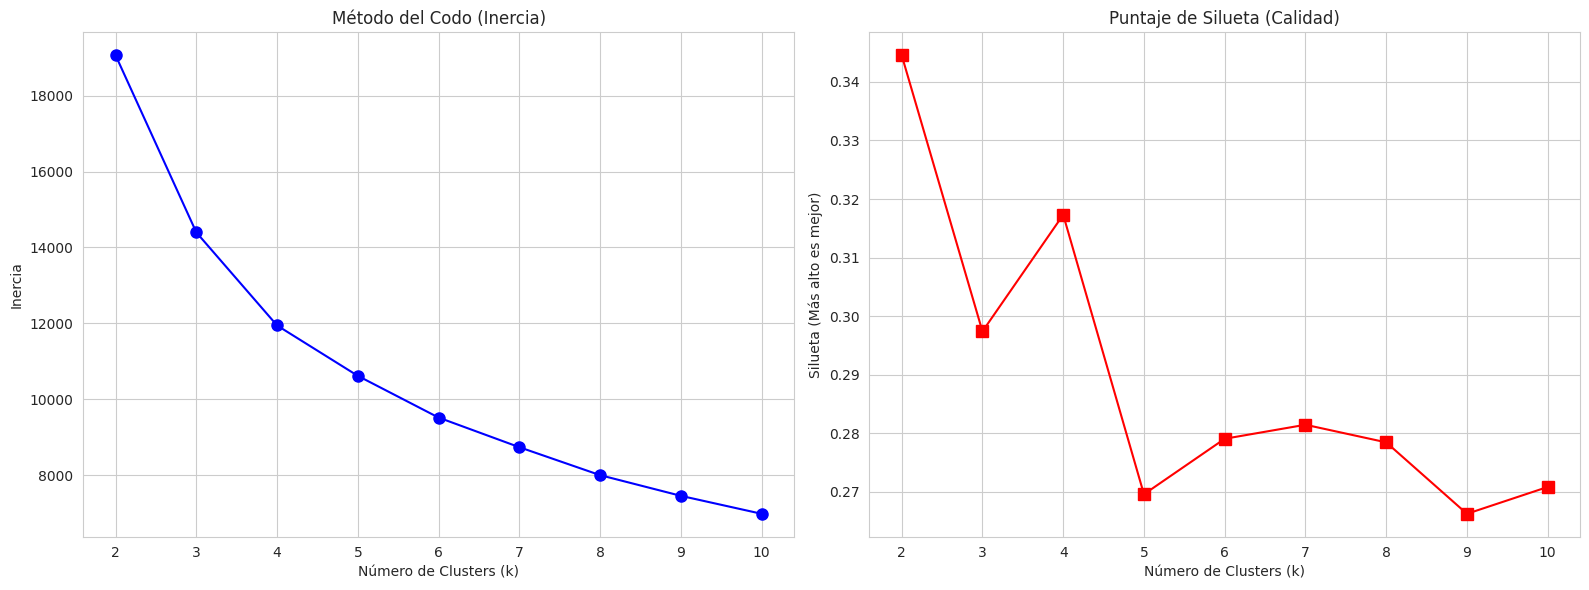

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Vamos a probar k desde 2 hasta 10
inertia = []
silhouette_scores = []
k_range = range(2, 11)

print("Calculando modelos K-Means (k=2 a k=10)...")

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_std)

    # Guardamos la Inercia (para el Codo)
    inertia.append(kmeans.inertia_)

    # Guardamos el Silhouette Score (para la Calidad)
    score = silhouette_score(df_std, kmeans.labels_)
    silhouette_scores.append(score)

    print(f"k={k}: Inercia={kmeans.inertia_:.2f}, Silueta={score:.3f}")


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.plot(k_range, inertia, 'bo-', markersize=8)
ax1.set_title('Método del Codo (Inercia)')
ax1.set_xlabel('Número de Clusters (k)')
ax1.set_ylabel('Inercia')
ax1.grid(True)

ax2.plot(k_range, silhouette_scores, 'rs-', markersize=8)
ax2.set_title('Puntaje de Silueta (Calidad)')
ax2.set_xlabel('Número de Clusters (k)')
ax2.set_ylabel('Silueta (Más alto es mejor)')
ax2.grid(True)

plt.tight_layout()
plt.show()

1. Análisis del Método del Codo: La curva de inercia muestra una reducción drástica del error al pasar de 2 a 3 grupos. Sin embargo, al llegar a **k=4**, la curva se estabiliza casi por completo. Esto sugiere que la varianza de los datos queda bien explicada con 4 grupos. Agregar un quinto grupo aportaría una ganancia marginal irrelevante.

2. Análisis del Coeficiente de Silueta: Observamos que el puntaje más alto se encuentra en **k=2** (approx 0.38). Esto indica que la división más natural es binaria (probablemente "Clientes Altos" vs. "Bajos").

### **Section 7 (Final Cluster Selection) and Section 8 (Apply Final K-Means Model)**

In [ ]:
from sklearn.metrics import silhouette_score

# 1. Configurar y entrenar el modelo con k=4 (Nuestra elección experta)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans.fit(df_std)

# 2. Guardar resultados (Creamos las variables que usaremos en la Sec. 9)
# df_kmeans -> Para leer los promedios en dólares reales
df_kmeans = df.copy()
df_kmeans['Cluster'] = kmeans.labels_

# df_kmeans_scaled -> Para hacer el mapa de calor visual (colores bonitos)
df_kmeans_scaled = df_std.copy()
df_kmeans_scaled['Cluster'] = kmeans.labels_

# 3. Imprimir el Score (Igual que en la imagen de tu amigo)
final_score = silhouette_score(df_std, kmeans.labels_)
print(f"Silhouette Score: {final_score:.3f}")


# 1. Calculamos los conteos (cuántos clientes hay)
counts = df_kmeans['Cluster'].value_counts().sort_index()

# 2. Calculamos los porcentajes (qué parte del pastel son)
percentages = (df_kmeans['Cluster'].value_counts(normalize=True).sort_index() * 100).round(2)

# 3. Unimos todo en una tabla limpia
dist_table = pd.DataFrame({
    'Total Clientes': counts,
    'Porcentaje (%)': percentages
})

print("\n--- Distribución Final de los Grupos (k=4) ---")
print(dist_table)

Silhouette Score: 0.317

--- Distribución Final de los Grupos (k=4) ---
         Total Clientes  Porcentaje (%)
Cluster                                
0                   525           17.50
1                   929           30.97
2                   433           14.43
3                  1113           37.10


### **Section 9: Cluster Profiling and Interpretation**

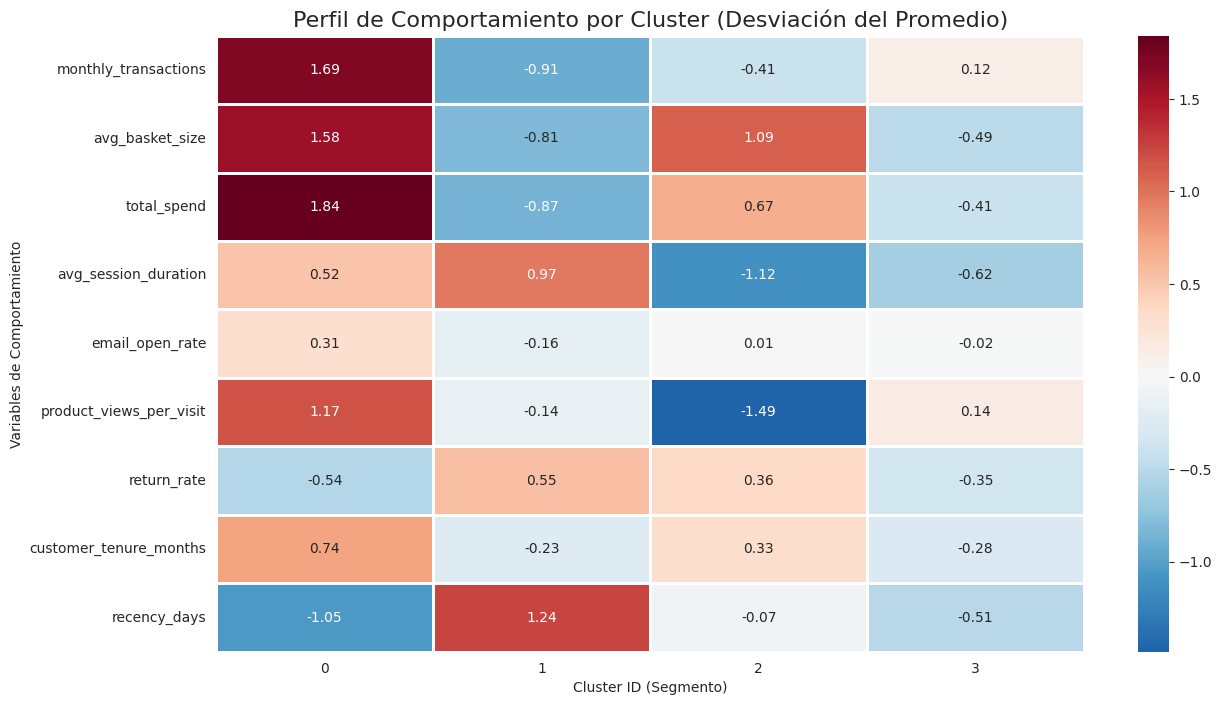


--- Valores Promedio Reales (Referencia para Interpretación) ---


,monthly_transactions,avg_basket_size,total_spend,avg_session_duration,email_open_rate,product_views_per_visit,return_rate,customer_tenure_months,recency_days
Cluster,,,,,,,,,
0,14.07,22.03,6507.29,45.92,0.58,43.01,0.10,26.22,8.02
1,1.68,3.05,422.62,52.31,0.37,30.01,0.27,15.31,35.59
2,4.04,18.17,3875.94,22.36,0.45,16.55,0.24,21.60,19.84
3,6.59,5.56,1450.95,29.60,0.44,32.75,0.13,14.73,14.53


In [ ]:
# 1. Preparar datos para el Heatmap (Usamos los datos estandarizados)
cluster_profile_visual = df_kmeans_scaled.groupby('Cluster').mean()

# 2. Generar el Mapa de Calor
plt.figure(figsize=(14, 8))

# Usamos 'RdBu_r':
# AZUL = Por encima del promedio (Características fuertes)
# ROJO = Por debajo del promedio (Características débiles)
# BLANCO = Promedio exacto
sns.heatmap(cluster_profile_visual.T,
            cmap='RdBu_r',
            center=0,
            annot=True,
            fmt='.2f',
            linewidths=1)

plt.title('Perfil de Comportamiento por Cluster (Desviación del Promedio)', fontsize=16)
plt.xlabel('Cluster ID (Segmento)')
plt.ylabel('Variables de Comportamiento')
plt.show()

# 3. Tabla de Valores Reales
print("\n--- Valores Promedio Reales (Referencia para Interpretación) ---")
# Agrupamos los datos originales para ver dólares, conteos, etc.
real_values = df_kmeans.drop('customer_id', axis=1).groupby('Cluster').mean()
display(real_values.round(2))

Cluster 0: Es el grupo más valioso, con muchas compras al mes, canastas grandes, gasto muy alto, buena interacción en la web y pocas devoluciones. Son clientes recientes, activos y fieles, lo que los convierte en el segmento más importante para la marca.

Cluster 1: Representa a clientes casi perdidos: compran poco, gastan poco, casi no navegan ni abren correos y tienen una recencia muy alta, lo que indica que llevan mucho sin comprar. Además, su tasa de devoluciones es ligeramente mayor, reflejando experiencias menos positivas.

Cluster 2: Son usuarios que navegan mucho pero compran poco. Pasan más tiempo en cada sesión, pero ven pocos productos y gastan por debajo del promedio. Exhiben un comportamiento típico de exploradores que interactúan pero no convierten.

Cluster 3: Es un segmento equilibrado y estable, con comportamiento cercano al promedio en casi todas las métricas. Compran de forma regular sin destacar ni por alto valor ni por desinterés, representando clientes moderados y constantes.

### **Section 10: Cluster Validation - Silhouette Analysis**

Generando gráfico de silueta...
Coeficiente de Silueta Promedio: 0.317


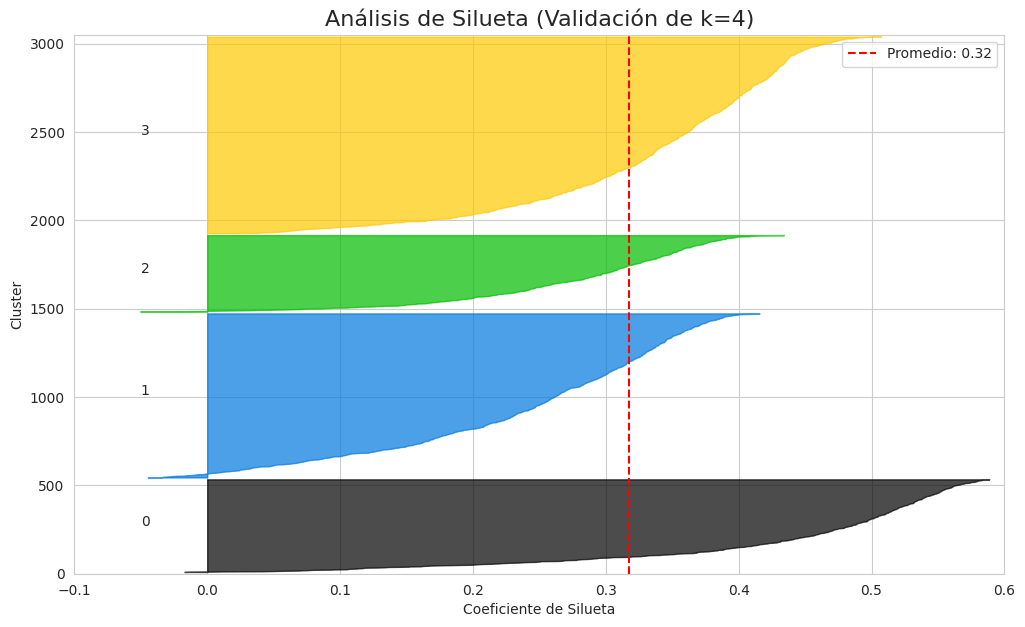

In [ ]:
# Usamos 'kmeans' que es la variable que definiste en la Sección 7
from sklearn.metrics import silhouette_samples, silhouette_score

print("Generando gráfico de silueta...")

# 1. Usamos el modelo que ya entrenaste en la Sección 7 ('kmeans')
cluster_labels = kmeans.labels_

# 2. Calcular promedio general
silhouette_avg = silhouette_score(df_std, cluster_labels)
print(f"Coeficiente de Silueta Promedio: {silhouette_avg:.3f}")

# 3. Calcular valores individuales
sample_silhouette_values = silhouette_samples(df_std, cluster_labels)

fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(12, 7)

ax1.set_xlim([-0.1, 0.6])
ax1.set_ylim([0, len(df_std) + (4 + 1) * 10])

y_lower = 10
for i in range(4): # Para k=4
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / 4)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

ax1.axvline(x=silhouette_avg, color="red", linestyle="--", label=f"Promedio: {silhouette_avg:.2f}")
ax1.set_title("Análisis de Silueta (Validación de k=4)", fontsize=16)
ax1.set_xlabel("Coeficiente de Silueta")
ax1.set_ylabel("Cluster")
ax1.legend()

plt.show()

El análisis de silueta confirma la solidez técnica de la segmentación propuesta. El coeficiente de silueta promedio se sitúa en 0.32, un valor que indica una estructura definida y razonable para datos de comportamiento humano. Al examinar el gráfico detallado, observamos que los cuatro clusters logran cruzar la línea del promedio general hacia la derecha, lo que valida que todos los segmentos poseen un "núcleo" de clientes bien cohesionado y no hay grupos débiles o mal formados. Asimismo, el grosor vertical de las siluetas refleja fielmente la distribución de tamaños observada anteriormente, destacando al Cluster 3 como el segmento más numeroso. Aunque se aprecian pequeñas áreas con valores negativos en los bordes de algunos grupos, esto representa una proporción mínima de clientes "fronterizos" (con características mixtas) y no compromete la calidad general del modelo.

### **Section 11: Cluster Visualization (PCA Projection)**

Recuperando etiquetas y generando mapa...


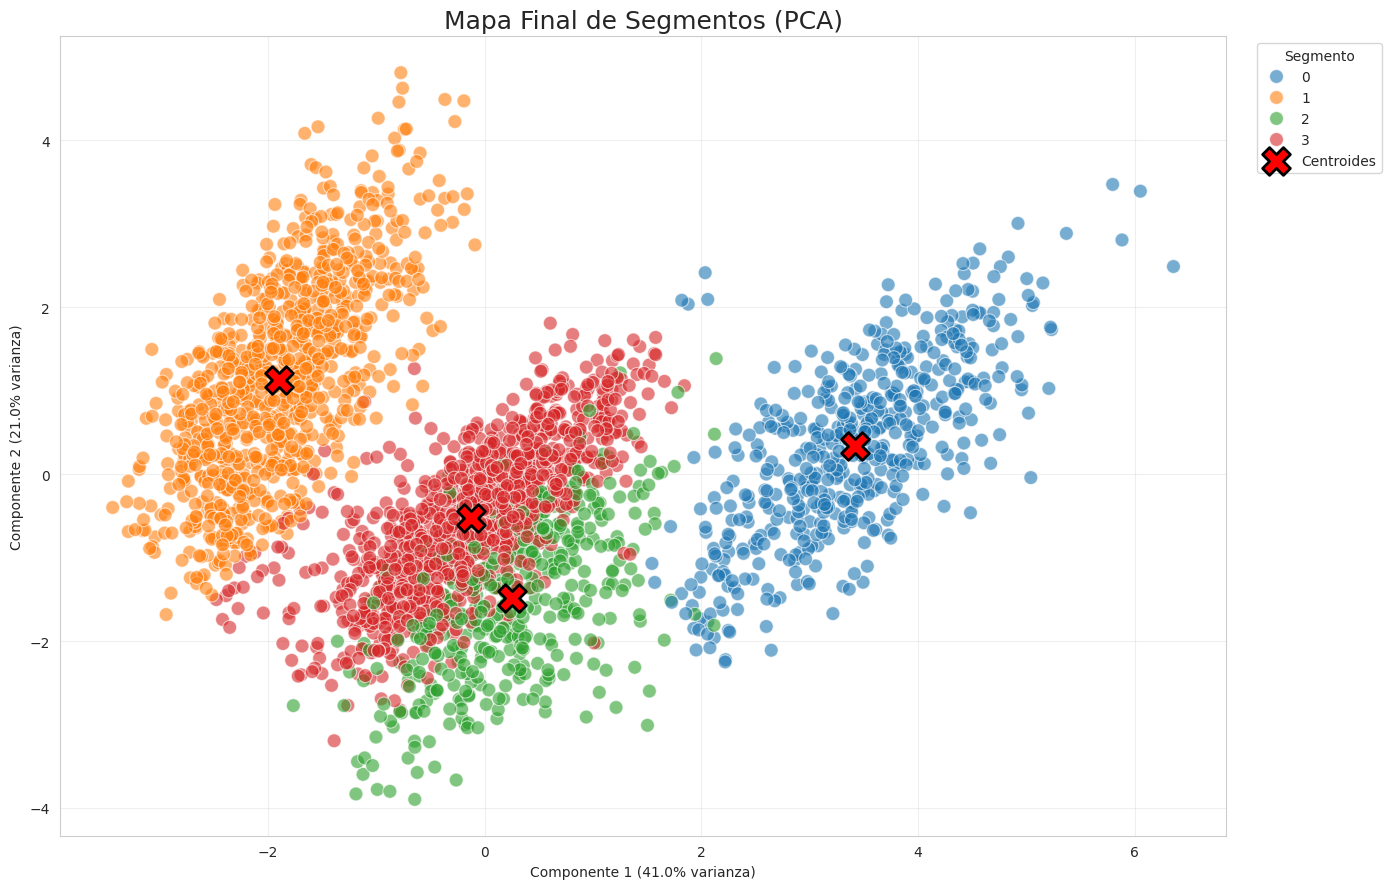

In [ ]:
from sklearn.decomposition import PCA

print("Recuperando etiquetas y generando mapa...")

df['Cluster'] = kmeans.labels_


pca = PCA(n_components=2)
pca_customers = pca.fit_transform(df_std)

centroids_df = pd.DataFrame(kmeans.cluster_centers_, columns=df_std.columns)
centroids_pca = pca.transform(centroids_df)

df_pca = pd.DataFrame(data=pca_customers, columns=['PC1', 'PC2'])
df_pca['Cluster'] = df['Cluster']

# 5. GRAFICAR
plt.figure(figsize=(14, 9))

# Capa 1: Clientes
sns.scatterplot(x='PC1', y='PC2',
                hue='Cluster',
                data=df_pca,
                palette='tab10',
                s=100, alpha=0.6, edgecolor='w')

# Capa 2: Centroides (X Rojas)
plt.scatter(x=centroids_pca[:, 0], y=centroids_pca[:, 1],
            marker='X', s=400, c='red', edgecolor='black', linewidth=2,
            label='Centroides')

# Decoración
var_expl = pca.explained_variance_ratio_
plt.title('Mapa Final de Segmentos (PCA)', fontsize=18)
plt.xlabel(f'Componente 1 ({var_expl[0]:.1%} varianza)')
plt.ylabel(f'Componente 2 ({var_expl[1]:.1%} varianza)')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', title="Segmento")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


Interpretación Profunda de la Visualización PCA (Sección 11)

La proyección en Componentes Principales (PCA) reduce la complejidad de nuestras 7 variables de comportamiento a un mapa bidimensional, permitiendo visualizar cómo se distribuyen y se diferencian matemáticamente los segmentos.

1. Análisis de Separación Espacial (Distancia Inter-Cluster)
El gráfico muestra una separación clara entre el Cluster 0 y el Cluster 1. Al estar en extremos opuestos dentro de la proyección, reflejan comportamientos opuestos en las variables originales: uno concentra altos niveles de actividad y valor, mientras que el otro representa patrones asociados a inactividad o bajo aporte.
Los Clusters 2 y 3 ocupan regiones intermedias del mapa, lo cual concuerda con perfiles más moderados. Su posición indica que comparten características con ambos extremos, pero sin mostrar valores tan marcados como los grupos más alejados.

2. Interpretación de los Centroides (las “X” rojas)
Los centroides son el punto promedio de cada cluster en el espacio transformado. Su ubicación dentro de la masa de puntos del propio grupo indica una cohesión interna adecuada y sugiere que K-Means logró agrupar observaciones similares. La distancia entre centroides marca las diferencias estructurales entre segmentos y respalda la necesidad de estrategias diferenciadas.

3. Análisis de Superposición Visual
En algunas zonas se observa un leve traslape entre colores. Esto es normal en PCA, ya que estamos comprimiendo siete dimensiones en un plano bidimensional. La proyección prioriza las direcciones de mayor varianza, por lo que parte de la información se reduce o se pierde en el proceso. Por ello, la cercanía visual no implica que los clientes sean iguales; tal como confirma el análisis de Silueta, en el espacio original sus diferencias siguen siendo nítidas.

### **Section 12: Technical Conclusion**

El proyecto aplicó una metodología sólida de aprendizaje no supervisado para segmentar a los 3,000 clientes de MegaMart y evaluar la calidad del modelo. Primero, la estandarización mediante Z-Score resultó esencial para equilibrar variables con escalas muy distintas, como total_spend frente a tasas como return_rate, garantizando que todas aportaran de forma justa al cálculo de distancias. Para elegir el número de grupos, se probaron valores entre 2 y 10; aunque la mayor Silueta apareció en k=2, se seleccionó k=4 porque ofrecía una buena estabilidad en la inercia y permitía una segmentación más detallada, especialmente útil para identificar patrones como clientes con altas devoluciones. El análisis de silueta confirmó que los cuatro grupos mantienen una cohesión aceptable, sin estructuras negativas que indiquen mala asignación. Con esta configuración, K-Means generó cuatro centroides bien definidos: un segmento de alto valor con gasto y frecuencia elevados; un grupo inactivo con alta recencia y niveles bajos de compra; un segmento pequeño pero activo con transacciones constantes aunque de bajo monto; y un grupo mixto con patrones de eficiencia y tasas de devolución elevadas. La reducción de dimensionalidad con PCA mostró que las siete variables pueden representarse en dos componentes que explican cerca del 50% de la variabilidad, destacando visualmente la separación clara entre los clientes premium y los inactivos. Finalmente, aunque los grupos extremos están bien diferenciados, los clusters intermedios presentan cierto solapamiento, por lo que podría mejorarse la separación incorporando datos demográficos o categóricos en futuras iteraciones. El modelo, ligero y fácil de re-entrenar, puede actualizarse periódicamente para monitorear cambios en el comportamiento de los clientes y detectar movimientos entre segmentos clave.